## EDA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("data.csv")

In [19]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [21]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [22]:
# Target value check for classification.
df["Rain"].value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

### Visualization

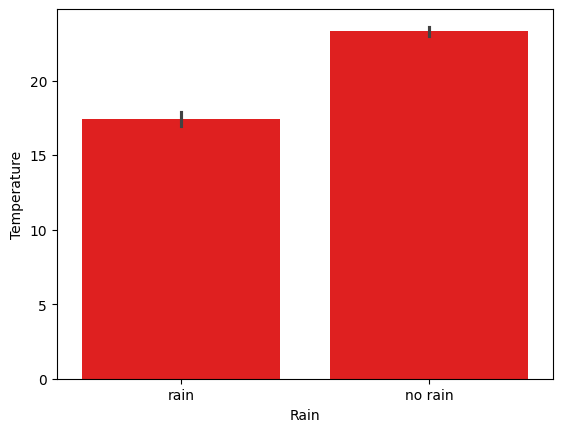

In [35]:
# relationship between Temperature Rain
x = df["Rain"]
y = df["Temperature"]
sns.barplot(x = x, y = y, color="red" ,data=df)
plt.show()

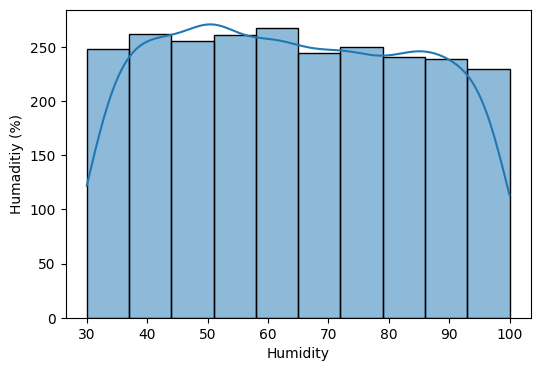

In [34]:
# Distrubition of Humidity
plt.figure(figsize=(6,4))
sns.histplot(df["Humidity"], bins=10,kde=True)
plt.ylabel("Humaditiy (%)")
plt.show()

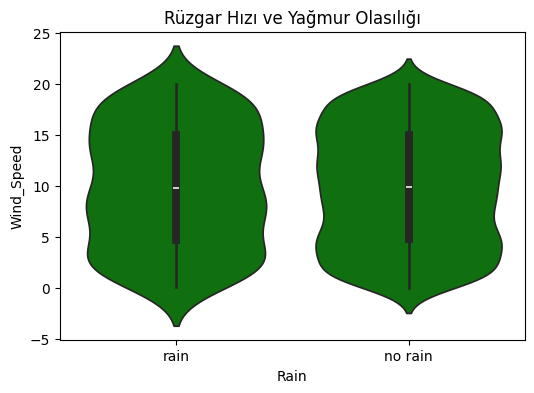

In [39]:
# Rüzgar Hızı ve Yağmur Olasılığı
x=df["Rain"]
y=df["Wind_Speed"]
plt.figure(figsize=(6,4))
sns.violinplot(x=x,y=y,color="green",data=df);
plt.title("Rüzgar Hızı ve Yağmur Olasılığı")
plt.show()

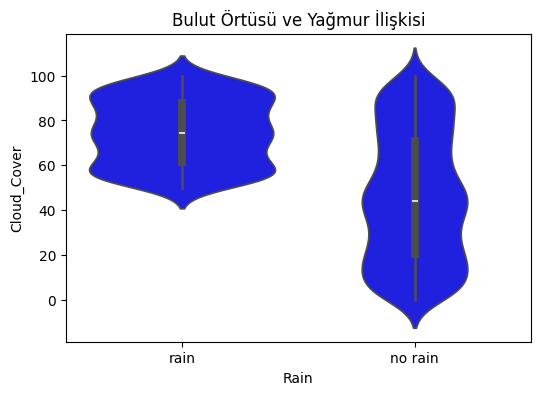

In [40]:
#  Bulut Örtüsü ve Yağmur İlişkisi
plt.figure(figsize=(6,4))
x = df["Rain"]
y = df["Cloud_Cover"]
sns.violinplot(x=x,y=y,color="blue",data=df)
plt.title("Bulut Örtüsü ve Yağmur İlişkisi")
plt.show()

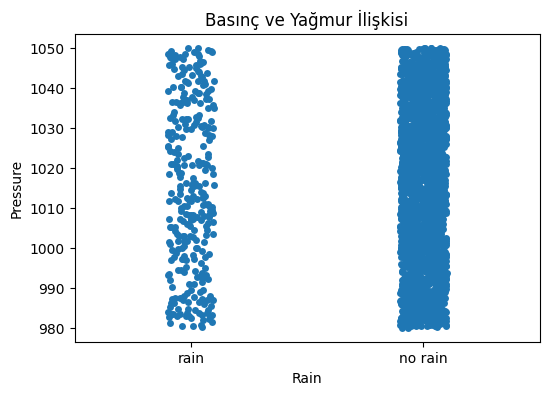

In [44]:
# Basınç ve Yağmur Olasılığı
x = df["Rain"]
y = df["Pressure"]
plt.figure(figsize=(6,4))
sns.stripplot(x=x, y=y, data=df, jitter=True)  # sns.catplot() same function
plt.title("Basınç ve Yağmur İlişkisi")
plt.show()

## Machine Learning

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [11]:
y = df['Rain'].values
X = df.drop('Rain', axis=1)

In [45]:
X

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614190
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181
2496,27.558479,46.481744,10.884915,39.715133,1008.590961
2497,28.108274,43.817178,2.897128,75.842952,999.119187
2498,14.789275,57.908105,2.374717,2.378743,1046.501875


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_predict = model.predict(x_test)

In [16]:
print("accuracy : ", accuracy_score(y_test,y_predict))

accuracy :  0.932
